### Week 20 Homework
#### Angela Spencer - February 16, 2022
##### 1.	Write a python program (not a Jupyter notebook, but a py file you run from the command line) that accepts the cats_txt.txt file as input and counts the frequency of all words and punctuation in that text file, ordered by frequency. Make sure to handle capital and lowercase versions of words and count them together.

    file name: text_count_program.py

##### 2.	Document how to run the program you created in question 1 in a readme.md file in your repo. Be as clear as possible. Use proper markdown, and consider using screenshots. Be sure to briefly discuss why this kind of exercise might be helpful for NLP in your markdown. 

    /Week_20/README.md

## 3.	Load the tokenized Paradise Lost from Gutenberg Corpus in NLTK. 
- https://www.nltk.org/book/ch02.html 
- Stem or lemmatize the words and find counts. 
- Select the top 20 words and create a histogram. 
- Exclude stop words and make sure you are including words of all capitalizations in your count. 
- If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list or top words, alter your logic to exclude them. 
- Specify why you chose stemming or lemmatization. 

In [1]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from collections import Counter
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import nltk

In [2]:
#import text from Gutenberg as sentences
nltk.corpus.gutenberg.fileids()
text_sentences = nltk.corpus.gutenberg.sents('milton-paradise.txt')
text_sentences
text_sent = [[word for word in lst] for lst in text_sentences]

print(text_sent[0:5])

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ['Of', 'Man', "'", 's', 'first', 'disobedience', ',', 'and', 'the', 'fruit', 'Of', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'into', 'the', 'World', ',', 'and', 'all', 'our', 'woe', ',', 'With', 'loss', 'of', 'Eden', ',', 'till', 'one', 'greater', 'Man', 'Restore', 'us', ',', 'and', 'regain', 'the', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', 'that', ',', 'on', 'the', 'secret', 'top', 'Of', 'Oreb', ',', 'or', 'of', 'Sinai', ',', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'In', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'Rose', 'out', 'of', 'Chaos', ':', 'or', ',', 'if', 'Sion', 'hill', 'Delight', 'thee', 'more', ',', 'and', 'Siloa', "'", 's', 'brook', 'that', 'flowed', 'Fast', 'by', 'the', 'oracle', 'of', 'God', ',', 'I', 'thence', 'Invoke', 'thy', 'aid', 'to', 'my', 'adventurous', 'song',

In [3]:
#create variable for stop words to remove from text
stop = set(nltk.corpus.stopwords.words('english'))

# compare all lowercase versions of words to stop words 
# remove numeric values and punctuation
filtered_list = []

for i in range(len(text_sent)):
    for word in text_sent[i]:
        if word.lower() not in stop and word.isalpha() == True:
            filtered_list.append(word)

print(filtered_list[0:5])

['Paradise', 'Lost', 'John', 'Milton', 'Book']


In [4]:
filtered_list2 = [[word for word in text_sent[i] if word.lower() not in stop and word.isalpha() == True]for i in range(len(text_sent))]
print(filtered_list2[0:5])

[['Paradise', 'Lost', 'John', 'Milton'], ['Book'], ['Man', 'first', 'disobedience', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'World', 'woe', 'loss', 'Eden', 'till', 'one', 'greater', 'Man', 'Restore', 'us', 'regain', 'blissful', 'seat', 'Sing', 'Heavenly', 'Muse', 'secret', 'top', 'Oreb', 'Sinai', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heavens', 'earth', 'Rose', 'Chaos', 'Sion', 'hill', 'Delight', 'thee', 'Siloa', 'brook', 'flowed', 'Fast', 'oracle', 'God', 'thence', 'Invoke', 'thy', 'aid', 'adventurous', 'song', 'middle', 'flight', 'intends', 'soar', 'th', 'Aonian', 'mount', 'pursues', 'Things', 'unattempted', 'yet', 'prose', 'rhyme'], ['chiefly', 'thou', 'Spirit', 'dost', 'prefer', 'temples', 'th', 'upright', 'heart', 'pure', 'Instruct', 'thou', 'know', 'st', 'thou', 'first', 'Wast', 'present', 'mighty', 'wings', 'outspread', 'Dove', 'like', 'sat', 'st', 'brooding', 'vast', 'Abyss', 'mad', 'st', 'pregnan

###### Stemming

In [5]:
#instantiate stemming object
stemmer = SnowballStemmer(language='english')

#create a new list of stemmer applied to each word in filtered_list
stem_words = [stemmer.stem(word) for word in filtered_list]
stem_words

#count the number of occurances, print the top 20
stem_count = Counter(stem_words)
stem_count.most_common(20)

[('heaven', 485),
 ('thou', 432),
 ('thi', 414),
 ('thee', 358),
 ('thus', 318),
 ('god', 316),
 ('shall', 283),
 ('earth', 228),
 ('yet', 228),
 ('though', 217),
 ('us', 187),
 ('man', 178),
 ('first', 175),
 ('high', 159),
 ('day', 157),
 ('one', 142),
 ('power', 133),
 ('like', 132),
 ('son', 132),
 ('great', 130)]

In [6]:
#Words to remove 
remove_list = ['thou', 'thi', 'thee', 'thus', 'shall', 'yet', 'like', 'though', 'till', 'may']

#update the stem words list to remove words in remove_list
stem_words_updated = [stem for stem in stem_words if stem not in remove_list]
stem_words_updated

#update stem count and print 20 most common words
stem_count_updated = Counter(stem_words_updated)
stem_count_updated.most_common(20)

[('heaven', 485),
 ('god', 316),
 ('earth', 228),
 ('us', 187),
 ('man', 178),
 ('first', 175),
 ('high', 159),
 ('day', 157),
 ('one', 142),
 ('power', 133),
 ('son', 132),
 ('great', 130),
 ('far', 129),
 ('death', 127),
 ('world', 122),
 ('light', 122),
 ('good', 122),
 ('hell', 119),
 ('night', 117),
 ('love', 117)]

###### Lemmatizing

In [7]:
#instantiate lemmatizing object
lemmatizer = WordNetLemmatizer()

#create a new list of lemmatizer applied to each word in filtered_list
lem_words = [lemmatizer.lemmatize(word.lower()) for word in filtered_list]
lem_words

#count occurances and print top 20
lem_count = Counter(lem_words)
lem_count.most_common(20)

[('heaven', 436),
 ('thou', 432),
 ('thy', 414),
 ('thee', 358),
 ('thus', 318),
 ('god', 316),
 ('shall', 283),
 ('yet', 228),
 ('earth', 217),
 ('though', 217),
 ('u', 187),
 ('man', 176),
 ('first', 175),
 ('day', 157),
 ('high', 153),
 ('one', 142),
 ('son', 132),
 ('far', 129),
 ('death', 127),
 ('may', 126)]

In [8]:
#manually remove additional stop words
#Words to remove 
remove_list2 = ['thou', 'thi', 'thee', 'thus', 'shall', 'yet', 'hath' 
                'like', 'though', 'till', 'may', 'u', 'thy']

#update the stem words list to remove words in remove_list
lem_words_updated = [lem for lem in lem_words if lem not in remove_list2]
lem_words_updated

#count occurances in updated list
lem_count_updated = Counter(lem_words_updated)
lem_count_updated.most_common(20)

[('heaven', 436),
 ('god', 316),
 ('earth', 217),
 ('man', 176),
 ('first', 175),
 ('day', 157),
 ('high', 153),
 ('one', 142),
 ('son', 132),
 ('far', 129),
 ('death', 127),
 ('power', 125),
 ('great', 123),
 ('like', 120),
 ('world', 119),
 ('hell', 119),
 ('thing', 116),
 ('light', 116),
 ('hath', 113),
 ('angel', 111)]

###### Comparison

In [9]:
import pandas as pd

#create dataframe of most common stemmed and lemmatized words
stem_count_20 = pd.DataFrame(stem_count_updated.most_common(20), columns = ['word', 'stem_freq'])
lem_count_20 = pd.DataFrame(lem_count_updated.most_common(20), columns = ['word', 'lem_freq'])

#create a dataframe showing the words both counts have in common
intersection = stem_count_20.merge(lem_count_20, on='word')
display(intersection)

#create a dataframe of the words that are different between the two counts
difference = stem_count_20.merge(lem_count_20, how='outer', on='word', indicator = True)
difference = difference[difference['_merge'] != 'both'].reset_index()
display(difference)

,word,stem_freq,lem_freq
0,heaven,485,436
1,god,316,316
2,earth,228,217
3,man,178,176
4,first,175,175
5,high,159,153
6,day,157,157
7,one,142,142
8,power,133,125
9,son,132,132


,index,word,stem_freq,lem_freq,_merge
0,3,us,187.0,NaN,left_only
1,16,good,122.0,NaN,left_only
2,18,night,117.0,NaN,left_only
3,19,love,117.0,NaN,left_only
4,20,like,NaN,120.0,right_only
5,21,thing,NaN,116.0,right_only
6,22,hath,NaN,113.0,right_only
7,23,angel,NaN,111.0,right_only


###### Plotting Results

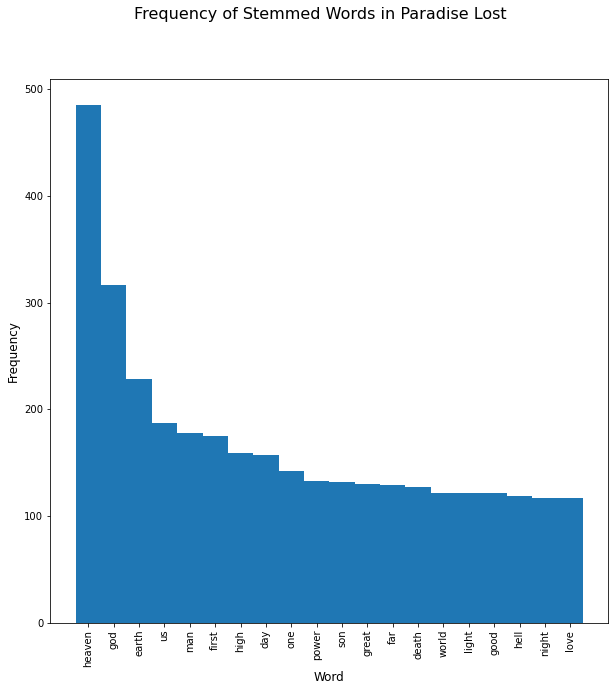

In [10]:
import matplotlib.pyplot as plt

#Stemming results plot
fig = plt.figure(figsize=[10,10])
fig.suptitle('Frequency of Stemmed Words in Paradise Lost', fontsize=16)
plt.bar(stem_count_20['word'], stem_count_20['stem_freq'], 1)
plt.xticks(rotation='vertical')
plt.xlabel('Word', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

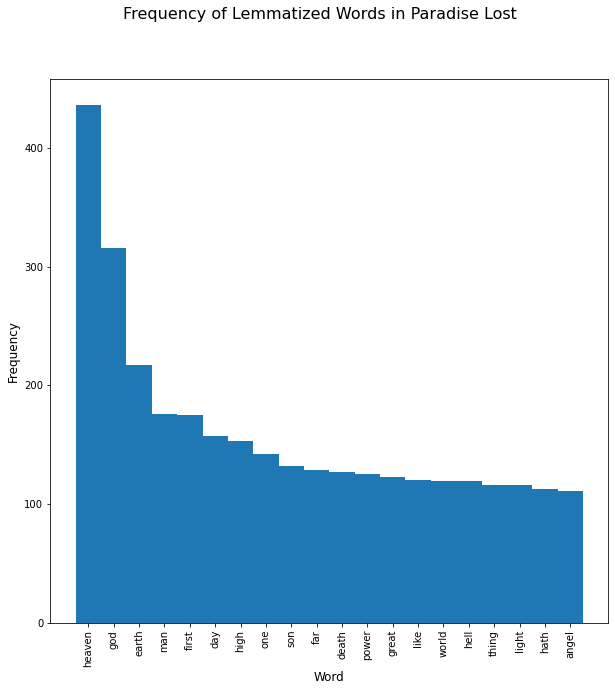

In [11]:
#Lemmatization results plot
fig = plt.figure(figsize=[10,10])
fig.suptitle('Frequency of Lemmatized Words in Paradise Lost', fontsize=16)
plt.bar(lem_count_20['word'], lem_count_20['lem_freq'], 1)
plt.xticks(rotation='vertical')
plt.xlabel('Word', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

###### Conclusion 

I chose to perform both Stemming and Lemmitization to compare the difference between the two techniques for this text. Overall they had an overlap of 15 of the 20 top words.  My instinct is that lemmitization woulb be a better choice for this particular text because of the nature of old English words. Lemmatization may have a better success rate in finding the roots compared to modern English texts.


## 4.	Perform Vader Sentiment Analysis.
- Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost. 
        http://www.nltk.org/howto/sentiment.html 
- This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run. 

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [13]:
#use original imported text to convert tokens into readable text
sentence_list = []
for i, word_list in enumerate(text_sent):
    new_sentence = ' '.join(word_list).replace(' ;', ';').replace(' , ',', ').replace(' : ',': ').replace(" ' ", "'").replace(" ,'", ",'").replace(' ?', '?').replace(' .', '.').replace(' !', '!').replace(' :', ':')
    sentence_list.append([new_sentence])
print(sentence_list[0:5])

[['[ Paradise Lost by John Milton 1667 ]'], ['Book I'], ["Of Man's first disobedience, and the fruit Of that forbidden tree whose mortal taste Brought death into the World, and all our woe, With loss of Eden, till one greater Man Restore us, and regain the blissful seat, Sing, Heavenly Muse, that, on the secret top Of Oreb, or of Sinai, didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos: or, if Sion hill Delight thee more, and Siloa's brook that flowed Fast by the oracle of God, I thence Invoke thy aid to my adventurous song, That with no middle flight intends to soar Above th'Aonian mount, while it pursues Things unattempted yet in prose or rhyme."], ["And chiefly thou, O Spirit, that dost prefer Before all temples th'upright heart and pure, Instruct me, for thou know'st; thou from the first Wast present, and, with mighty wings outspread, Dove - like sat'st brooding on the vast Abyss, And mad'st it pregnant: what i

###### Sentiment Analysis

In [14]:
#remove title and end from text to analyze
sentence_slice = sentence_list[2:-1]
sentence_slice

#create a subset of the text to build analyzer loop
subset = sentence_list[-10:-1]
print(subset[0][0])
print(subset[1][0])

Henceforth I learn, that to obey is best, And love with fear the only God; to walk As in his presence; ever to observe His providence; and on him sole depend, Merciful over all his works, with good Still overcoming evil, and by small Accomplishing great things, by things deemed weak Subverting worldly strong, and worldly wise By simply meek: that suffering for truth's sake Is fortitude to highest victory, And, to the faithful, death the gate of life; Taught this by his example, whom I now Acknowledge my Redeemer ever blest.
To whom thus also the Angel last replied.


In [15]:
#instantiate Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

#instantiate lists to hold values extracted from Sentiment Analyzer
text = []
compound = []
positive = []
neutral = []
negative = []

#define function to analyze each sentence, extract sentiment values, and append to lists
def analyze(txt):
    for i, sent in enumerate(txt):
        sentiment = analyzer.polarity_scores(txt[i][0])
        #print('sentence '+ str(i)+':')
        #print(sentiment)
        text.append(txt[i])
        compound.append(sentiment['compound'])
        positive.append(sentiment['pos'])
        neutral.append(sentiment['neu'])
        negative.append(sentiment['neg'])


In [16]:
#analyze the sentence in the prepared text
#analyze(subset)
analyze(sentence_slice)

In [17]:
#convert lists to series and concat into dataframe
sentiment_df = pd.concat([pd.Series(text, name='sentence', dtype='str'), 
                          pd.Series(compound, name='compound', dtype='float'), 
                          pd.Series(positive, name='positive', dtype='float'), 
                          pd.Series(neutral, name='neutral', dtype='float'), 
                          pd.Series(negative, name='negative', dtype='float')], 
                          axis=1)
print(sentiment_df.shape)
sentiment_df.head(5)

(1848, 5)


,sentence,compound,positive,neutral,negative
0,"(Of Man's first disobedience, and the fruit Of...",0.8885,0.194,0.689,0.117
1,"(And chiefly thou, O Spirit, that dost prefer ...",0.8546,0.175,0.771,0.054
2,(Say first -- for Heaven hides nothing from th...,0.8689,0.239,0.668,0.093
3,"(Who first seduced them to that foul revolt?,)",-0.3612,0.000,0.737,0.263
4,"(Th'infernal Serpent; he it was whose guile, S...",0.6808,0.221,0.601,0.178


###### Top 5 Sentences per Sentiment

In [18]:
#drop duplicate sentences
sentiment_df.drop_duplicates(subset='sentence', inplace=True)

#drop additional duplicate in top 5
sentiment_df.drop(labels=603, inplace=True)
sentiment_df.reset_index()
sentiment_df.head(5)

,sentence,compound,positive,neutral,negative
0,"(Of Man's first disobedience, and the fruit Of...",0.8885,0.194,0.689,0.117
1,"(And chiefly thou, O Spirit, that dost prefer ...",0.8546,0.175,0.771,0.054
2,(Say first -- for Heaven hides nothing from th...,0.8689,0.239,0.668,0.093
3,"(Who first seduced them to that foul revolt?,)",-0.3612,0.000,0.737,0.263
4,"(Th'infernal Serpent; he it was whose guile, S...",0.6808,0.221,0.601,0.178


In [19]:
#find top 5 values of each sentiemnt category
top5_pos = sentiment_df.sort_values('positive', ascending=False).head(5)
top5_neu = sentiment_df.sort_values('neutral', ascending=False).head(5)
top5_neg = sentiment_df.sort_values('negative', ascending=False).head(5)

display(top5_pos, top5_neu, top5_neg)

,sentence,compound,positive,neutral,negative
906,"(O Friends!,)",0.5255,1.000,0.000,0.0
826,"(O Heaven!,)",0.5562,1.000,0.000,0.0
1231,"(She fair, divinely fair, fit love for Gods!,)",0.9381,0.838,0.162,0.0
1140,"(Be strong, live happy, and love!,)",0.9098,0.793,0.207,0.0
624,"(Courageous Chief!,)",0.5707,0.787,0.213,0.0


,sentence,compound,positive,neutral,negative
1432,"(Whence Adam, faltering long, thus answered br...",0.0,0.0,1.0,0.0
1663,"(Celestial, whether among the Thrones, or name...",0.0,0.0,1.0,0.0
1688,"(both for the deed, and for the cause!,)",0.0,0.0,1.0,0.0
1686,"(To which our sire.,)",0.0,0.0,1.0,0.0
1684,"(To whom Michael thus, he also moved, replied.,)",0.0,0.0,1.0,0.0


,sentence,compound,positive,neutral,negative
151,"(No!,)",-0.3595,0.0,0.000,1.000
510,"(O Hell!,)",-0.7088,0.0,0.000,1.000
1687,"(Alas!,)",-0.3382,0.0,0.000,1.000
476,"(Me miserable!,)",-0.5411,0.0,0.223,0.777
173,"(Sad cure!,)",-0.5255,0.0,0.228,0.772


##### 5.	Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not. 

Based on observations from the sentiment analysis, the top 5 positive sentiments and top 5 negative sentiments tend to be short sentences with exclamation points and words that align strongly with positive or negative feelings, respectively.  The neutral sentiments tend to be long and conenctive sentences without much emotional expression.

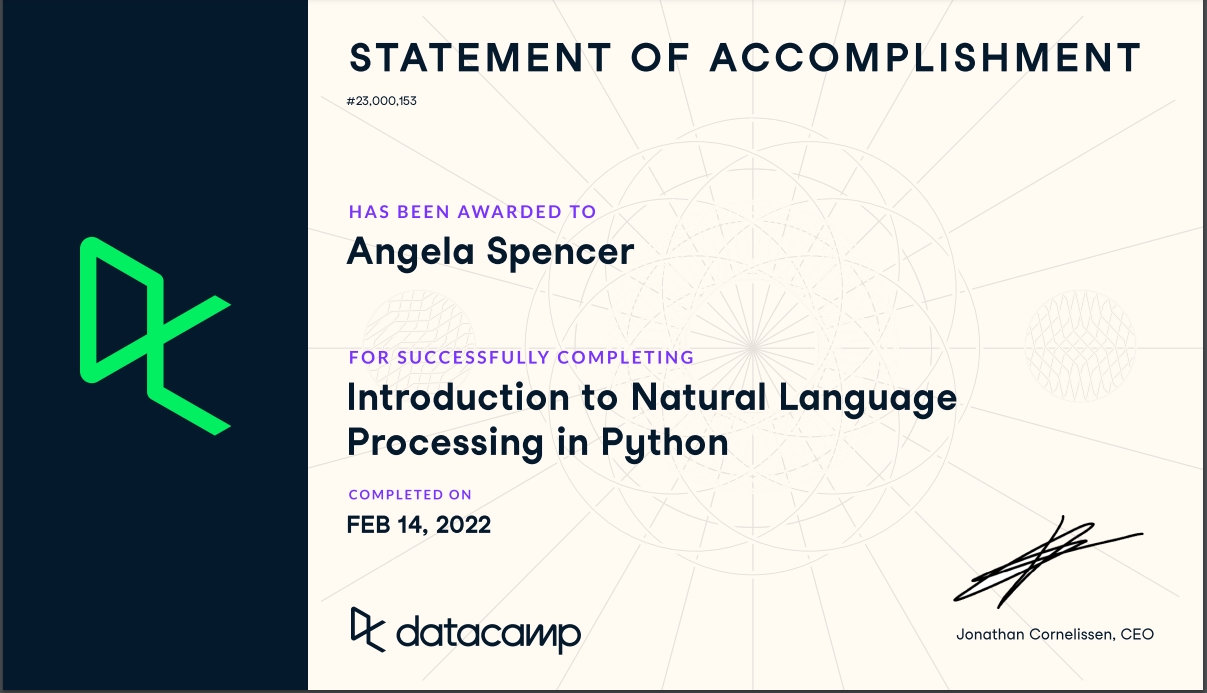